<a href="https://colab.research.google.com/github/chenyan1998/1D-JAVA-App/blob/master/CDS_Lab_3b_visualisation_(questions)_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data visualisation in Python

__Prof. Dorien Herremans__


**Open the tutorial in 'File -> Playground mode'. Go through the tutorial first. You will find several `#TODO` slots for you to address. They should be easy if you read through in detail. There are a number of open questions for you to solve as well. **


For a full overview of types of plots using matplotlib, see the gallery [at https://matplotlib.org/2.0.2/gallery.html](https://matplotlib.org/2.0.2/gallery.html)




## Scatterplots

We will be using scottish_hills.csv from [https://github.com/ourcodingclub/CC-python-pandas-matplotlib](https://github.com/ourcodingclub/CC-python-pandas-matplotlib). The file contains all the mountains above 3000 feet (about 914 metres) in Scotland. 

We can read this into a variable and see the first 10 lines. 

Use the dataframe.head(10) command along with print to have a look into the file. 

In [ ]:
import pandas as pd

dataframe = pd.read_csv("https://raw.githubusercontent.com/ourcodingclub/CC-python-pandas-matplotlib/master/scottish_hills.csv")


# TODO print out first 10 lines of the file

As explored last week, pandas dataframes can be used for some preliminary data exploration. For instance, let's sort the hills by height: 

In [ ]:
sorted_hills = dataframe.sort_values(by=['Height'], ascending=False)

# Let's have a look at the top 5 to check
print(sorted_hills.head(5))

Now let's load matplotlib. Note: if you are using a jupyter notebook you need the inline statement on line 1 below: 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

To save us some time, let's create some shortcut variables, x and y, to register the hight and latitude coordinates of each of the hills. 

In [ ]:
x = dataframe.Height
y = dataframe.Latitude
z = dataframe.Longitude

Now we are ready to start visualising them. Let's create (and save) a scatterplot. You can use the ` plt.scatter()` command with argument the height and latitude. 

In [ ]:
# TODO: create the scatterplot

plt.savefig("scottish_scatter_plot.png")

If you are not using iPython, you can use `plt.show()` to display the plot. 

Now let's build upon this graph by adding a linear regression line to it using the `linregress()` command and the same input variables as for scatterplot. 

In [ ]:
from scipy.stats import linregress
stats = # TODO calculate linear regression 

m = stats.slope
b = stats.intercept

Now we can add the plot of our linear regression by using the equation of a straight line. 

Add the equation of the linear regression based on the variables and slope/intercept calculated:

In [ ]:
plt.scatter(x, y)
plt.plot(x, #TODO Add equation of the line, color="red")  # The equation of the straight line.

Note, wether this line is statistically significant can be determined using the extra information in the stats object - `stats.rvalue` and `stats.pvalue`.

Now you can make your plot look nicer using arguments such as as fontsize, linewidth, color,...

In [ ]:
# Change the default figure size
plt.figure(figsize=(10,10))

# Change the default marker for the scatter from circles to x's
plt.scatter(x, y, marker='x')

# Set the linewidth on the regression line to 3px
plt.plot( #TODO add the original arguments + an option for linewidth. 

# Add x and y lables, and set their font size
plt.xlabel("Height (m)", fontsize=20)
plt.ylabel("Latitude", fontsize=20)

# Set the font size of the number lables on the axes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

Let's have a look at how the hills our spread out geographically using latitude (y) and longitude (z). Now we can use s = x to say that the size needs to be equal to the height (x). (I added -900 to make the difference between big and small mountains larger)

In [ ]:
import numpy as np 

colors = np.random.rand(len(y))  #generates a different color for each different mountain

plt.scatter(y, z, s = (x-900), c=colors, alpha=0.5)

## Histograms

Let's try some other graphs. A full selection is given at the [matplotlib website](https://matplotlib.org/2.0.2/examples/index.html). 

Let's start by looking at the distribution of our hills over the latitude (variable `y` from earlier): 

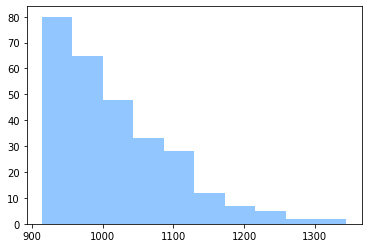

In [63]:
plt.hist(x, bins=25) #bins separates the latitude in 25 discrete categories. 

plt.savefig("histogram.png", dpi=25)  # results in 160x120 px image

Quickly style your plot with stylesheets, full overview [at https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html). 

Let's also create a new variable that contains the height of the hills -100m. This to illustrate how to add a second distribution to your graph. In this case, we will make them slightly transparent. 

Add a style to the graph using `plt.style.use()`

Text(0.5, 0, 'Height')

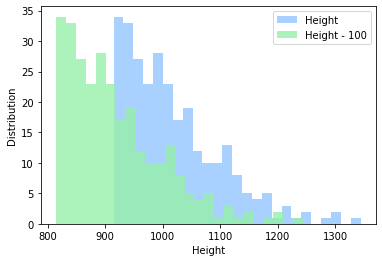

In [67]:
import numpy as np

# using a stylesheet:
# TODO add the style seaborn-pastel

plt.style.use('seaborn-pastel')

#creating the new height variable: 
shifted_x = x - 100

fig, ax = plt.subplots() # lets us acces the axis and plot seperately. 
ax.hist(x, bins=25,histtype="stepfilled", alpha=0.8,label='Height')
ax.hist(shifted_x, bins=25, histtype="stepfilled", alpha=0.8,label='Height - 100') 
ax.legend(prop={'size': 10})

ax.set_ylabel('Distribution')
ax.set_xlabel('Height')

## Bar charts

Plot the average $CO_2$ output of both vegetarians and meat eaters for different continents in a bar plot. The data is given below.

Add a legend to the ax using the `legend()` function and set an index value for the rects2 plot. 

In [ ]:
labels = ['EU', 'US', 'AS']

meateaters = [122, 135, 80]
vegetarians = [40, 43, 23]


# Keep a numeric index for the x-axis lables. This will be the positions of the ticks. 
index = np.arange(len(labels))


fig, ax = plt.subplots()

# Toy with the below parameters to change the appearance of your graph:
bar_width = 0.35
opacity = 0.6

rects1 = ax.bar(index, meateaters, bar_width,
                alpha=opacity, color='b',
                label='Meat eaters')

# Note, shift the x postion also with the bar width so that the bar appears next to the previous one±
rects2 = ax.bar(#TODO set an index which is shifted by the bar_width so that it's not entirely overlapping
                vegetarians, bar_width,
                alpha=opacity, color='r',
                label='Vegetarians')


ax.set_xlabel('Continent')
ax.set_ylabel('CO2 emissions')
ax.set_title('CO2 emissions per continent, per diet')

ax.set_xticks(index + bar_width / 2)

ax.set_xticklabels(labels)

#TODO add legend


## Line plots 

Let's move on to another type of graph: a simple line plot, but using two vertical axis. 

We will create a function to calculate the temperature in celcius given Fahrenheit. Add the function to calculate Calcius from the Fahrenheit `temp`.

In [ ]:
def fahrenheit2celsius(temp):
    """
    Returns temperature in Celsius.
    """
    return #TODO return the formula for getting Celcius from Fahrenheit


# TEMPURATURE AT EACH HOUR THROUGHOUT THE DAY (In Fahrenheit)
temperature = [100, 102, 106, 105, 90, 85, 85, 89, 100, 102, 103, 108, 100, 102, 106, 105, 90, 85, 85, 89, 100, 102, 103, 108]



We will use `twinx` to get a second set of axes. This allows us to plot the temperature evolution throughout the day using both C and F. 

In [ ]:
fig, ax_f = plt.subplots()
ax_c = ax_f.twinx()

#plot our data: 
ax_f.plot(temperature)
ax_f.set_xlim(0, 24) #x-axis shows 24 hours

# set the axis limits: 
y1, y2 = ax_f.get_ylim()
ax_c.set_ylim(fahrenheit2celsius(y1), fahrenheit2celsius(y2))
ax_c.figure.canvas.draw()

# change some axis labels
ax_f.set_title('Two scales: Fahrenheit and Celsius')
ax_f.set_ylabel('Fahrenheit')
ax_c.set_ylabel('Celsius')
ax_f.set_xlabel('Time (hour of day)')


Suppose we have a sinusoidal plot (formula line 2 below), and we want to fill it. First let's plot the sinusoid. 

In [ ]:
newx = np.linspace(0, 1, 500) # sample 500 X's linearly between 0 and 1
newy = np.sin(4 * np.pi * newx) * np.exp(-5 * newx) #formula for our sinusoidal graph 

fig, ax = plt.subplots()  #plt.subplots()  lets us acces the axis and plot seperately. 

ax.plot(newx, newy)

Then we can easily use the `fill()` command of ax to 'fill' the axes with the newly sampled data. 

In [ ]:
fig, ax = plt.subplots() 

#TODO fill the plot with the newly sampled data newx and newy


Axis labels can influence how we perceive the data. Let's have a look at this stock data, which has been stagnating recently. 

In [ ]:
# growth of stock A
stockA = [0, 10, 20, 30, 40, 60, 80, 140]

plt.plot(stockA)
# plt.ylim(bottom=0, top = 110) 
plt.xlabel('Time')
plt.ylabel('Stock A price')

Now let's change to a logaritmic axis. Other options here are `linear, log, logit, symlog`. Give it a try.



```
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

line, = ax.plot(stockA)
ax.set_yscale('log') #change the scale here

plt.xlabel('Time')
plt.ylabel('Stock A price')
ax.set_title('Logarithmic')
```



In [ ]:
# TODO try different axes scales

This illustrates how axes can deform the data... 

### Boxplots

For all the mountains, let's see what their average height is, with standard deviation in a boxplot. 



In [ ]:
plt.boxplot(x)

Easy enough. Now we can make this slightly nicer: 

In [ ]:
# notched plot
plt.figure()
plt.boxplot(x, 1)

# change outlier point symbols
plt.figure()
plt.boxplot(x, 0, 'gD')

# don't show outlier points
plt.figure()
plt.boxplot(x, 0, '')

# horizontal boxes
plt.figure()
plt.boxplot(x, 0, 'rs', 0)

# change whisker length
plt.figure()
plt.boxplot(x, 0, 'rs', 0, 0.75)

# Now to try yourself (Exercises): 

Load the dataset from `https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv`, and have a look at what it contains. 

Then create the following: 

1. A __histogram__ of the salaries for women.
2. Add the men's salaries to this histogram.
3. Give your histogram a dark background and label the axes.
4. Next, please label the colors of the histogram so we know who is what (men vs women). 
5. Instead of a histogram, create a __bar chart__ that lists the salary for women (y-axis) for each school. 
6. Also add men to this bar chart. 
7. Make the style nice and add labels.
8. Now create a nice __boxplot__ of the data, one for men, one for women (two box's same graph). 

## Solution: histogram

## Solution: Bar chart

## Solution: Boxplot

Well done!

## Interactive fun

There are a lot of libraries available to make plots more dynamic, for instance: https://mode.com/blog/python-interactive-plot-libraries/

Let's experiment a bit with Ploly: https://plotly.com/python/

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=go.Surface(z=z_data, showscale=False))
fig.update_layout(
    title='Mt Bruno Elevation',
    width=400, height=400,
    margin=dict(t=40, r=0, l=20, b=20)
)

name = 'default'
# Default parameters which are used when `layout.scene.camera` is not provided
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=1.25, y=1.25, z=1.25)
)

fig.update_layout(scene_camera=camera, title=name)
fig.show()

Move the plot around to see how it's interactive. Check out many more of the solutions on the plotly demo site

## Exercise: 

* Take the scatterplot from the scottish hills before, but now, visualize the height of the point you are clicking on dynamically. You can use the template from https://plotly.com/python/click-events/